In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [144]:
df = pd.read_csv("C:\\Users\\bduser\\Desktop\\Harsh_Thesis_work\\tsdf.csv")

df.drop(['Unnamed: 0'],axis=1,inplace=True)

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

df['Open'] = df['Open'].str.replace(',','')
df['Open'] = df['Open'].astype('float')

df['High'] = df['High'].str.replace(',','')
df['High'] = df['High'].astype('float')

df['Low'] = df['Low'].str.replace(',','')
df['Low'] = df['Low'].astype('float')


df['Vol.'] = df['Vol.'].astype(str)
for i in range(len(df['Vol.'])):
    if "K" in df['Vol.'][i]:
        df['Vol.'][i] = df['Vol.'][i].replace("K","")
        df['Vol.'][i] = float(df['Vol.'][i])
        df['Vol.'][i] =df['Vol.'][i]*1000

    elif "M" in df['Vol.'][i]:
        df['Vol.'][i] = df['Vol.'][i].replace("M","")
        df['Vol.'][i] = float(df['Vol.'][i])
        df['Vol.'][i] = df['Vol.'][i]*1000000

df['Vol.'] = df['Vol.'].astype(float)

df["Change %"] = df["Change %"].astype(str)
for i in range(len(df["Change %"])):
        df["Change %"][i] = df["Change %"][i].replace("%","")
df["Change %"] = df["Change %"].astype(float)

df['Date'] = pd.to_datetime(df['Date'])

#df.set_index("Date",inplace=True)

#df.sort_values(by='Date',inplace=True)

C:\Users\bduser\.conda\envs\Darts\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bduser\.conda\envs\Darts\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bduser\.conda\envs\Darts\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bduser\.conda\envs\Darts\lib\site-packages\ipykernel_launcher.py

In [145]:
df

,Date,Price,Open,High,Low,Vol.,Change %,sentiment_scores,total_tweets,bitcoin: (Worldwide)
0,2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,-2.93,0.065505,62044.0,44
1,2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,9.74,0.055192,77723.0,54
2,2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,2.73,0.043841,79086.0,55
3,2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,0.15,0.056670,74534.0,51
4,2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,11.69,0.048044,76404.0,50
...,...,...,...,...,...,...,...,...,...,...
687,2019-11-19,8145.7,8207.7,8245.6,8032.8,654270.0,-0.76,0.140930,16874.0,21
688,2019-11-20,8099.3,8145.7,8223.0,8074.2,607270.0,-0.57,0.155557,18338.0,19
689,2019-11-21,7627.9,8099.4,8129.6,7519.7,891500.0,-5.82,0.133958,21597.0,24
690,2019-11-22,7272.5,7627.9,7700.9,6818.5,1410000.0,-4.66,0.115185,24404.0,31


In [117]:
#df2=df[['Date','Price','Vol.','sentiment_scores','total_tweets','bitcoin: (Worldwide)']]

In [118]:
#df2.rename(columns={"Price":'y', "Date":'ds'}, inplace=True)
df.rename(columns={"Price":'y', "Date":'ds'}, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    692 non-null    datetime64[ns]
 1   y                     692 non-null    float64       
 2   Open                  692 non-null    float64       
 3   High                  692 non-null    float64       
 4   Low                   692 non-null    float64       
 5   Vol.                  692 non-null    float64       
 6   Change %              692 non-null    float64       
 7   sentiment_scores      692 non-null    float64       
 8   total_tweets          692 non-null    float64       
 9   bitcoin: (Worldwide)  692 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 54.2 KB


In [128]:
train = df.iloc[0:500,]
test = df.iloc[500:,]

In [129]:
model = Prophet(seasonality_mode="multiplicative")
model.add_regressor("Vol.",)
model.add_regressor("sentiment_scores", )
model.add_regressor("total_tweets", )
model.add_regressor("bitcoin: (Worldwide)", )
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
model.params

{'k': array([[-3.02988554]]),
 'm': array([[0.88210454]]),
 'delta': array([[-2.84461160e-08,  5.20515507e-01,  6.27377131e-01,
          3.53450910e-01,  1.08572757e+00,  2.08765519e-02,
          7.56574160e-08,  1.53183004e-10,  2.26004475e-09,
          3.55463750e-08,  1.99269764e-01,  1.30250312e-08,
          4.77036731e-09,  2.93117997e-09, -3.44425352e-07,
         -4.35170942e-03, -1.09993282e-01, -5.64505950e-01,
         -1.45387928e-05, -2.34240191e-09,  1.03101323e-07,
          3.87904968e-02,  1.48986123e-01,  4.92054346e-01,
          9.35292414e-01]]),
 'sigma_obs': array([[0.04720134]]),
 'beta': array([[-0.00191556,  0.00178337, -0.00048736, -0.00638027, -0.00040251,
         -0.00040275,  0.00039211,  0.00735893, -0.02826831, -0.01867057]]),
 'trend': array([[0.88210454, 0.87603262, 0.86996071, 0.86388879, 0.85781688,
         0.85174496, 0.84567305, 0.83960113, 0.83352922, 0.8274573 ,
         0.82138539, 0.81531347, 0.80924156, 0.80316964, 0.79709773,
         0.

In [131]:
#forecast for the next 30 days
#future = model.make_future_dataframe(periods=30)

test_1 = test.drop(['y'],axis=1)

#predict
forecast = model.predict(test_1)

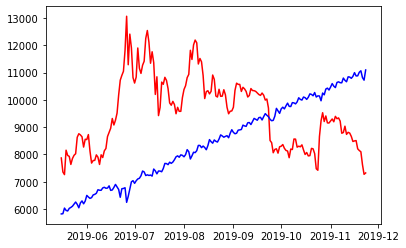

In [140]:
#visualize with Facebook internal tool
#figure_1 = model.plot(forecast,
#                    xlabel='Date',
#                    ylabel='Price')
plt.plot(test["ds"],test["y"],color="red",label='actual')
plt.plot(forecast["ds"],forecast["yhat"],color="blue",label="pred")

C:\Users\bduser\.conda\envs\Darts\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\bduser\.conda\envs\Darts\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


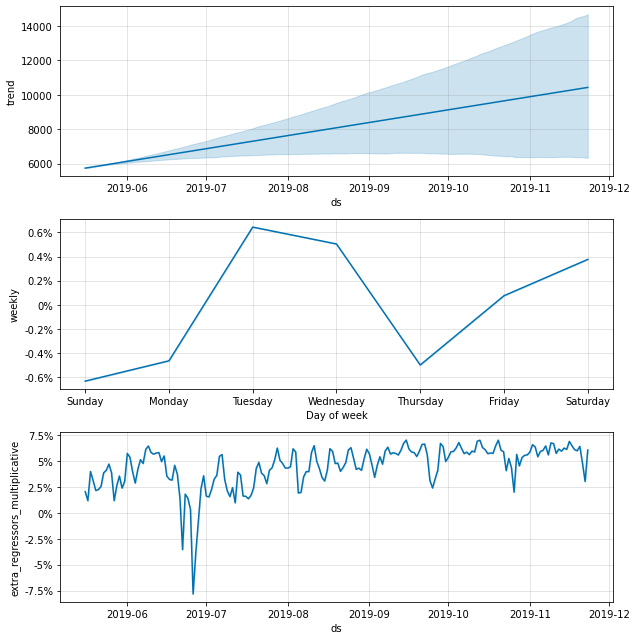

In [136]:
figure_2 = model.plot_components(forecast)

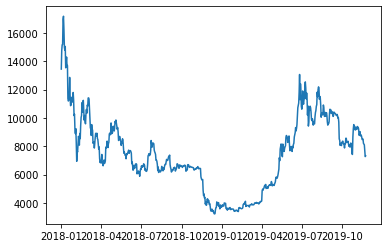

In [126]:
plt.plot(df['ds'],df['y'])a

In [153]:
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel, RNNModel, RandomForest, TCNModel, Prophet
from darts.utils.statistics import check_seasonality, plot_acf
from darts.metrics import mape
from darts.timeseries import TimeSeries

In [154]:
df_series = df[['Date','Price']]

In [155]:
df_series.set_index("Date",inplace=True)

In [156]:
df_series

,Price
Date,
2018-01-01,13444.9
2018-01-02,14754.1
2018-01-03,15156.6
2018-01-04,15180.1
2018-01-05,16954.8
...,...
2019-11-19,8145.7
2019-11-20,8099.3
2019-11-21,7627.9


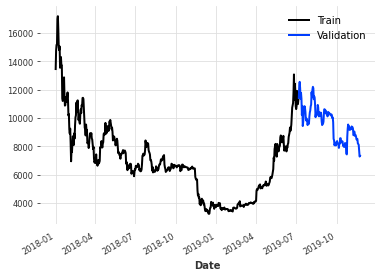

In [230]:
ts = TimeSeries.from_series(df_series)

train, val = ts.split_before(0.8)
train.plot(label="Train")
val.plot(label="Validation")

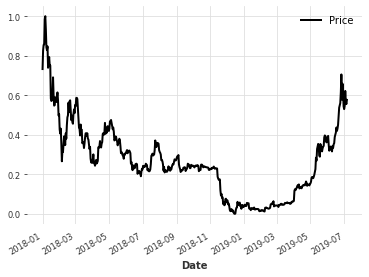

In [231]:
scaler = Scaler()

train_scaled = scaler.fit_transform(train)
train_scaled.plot()

In [258]:
from darts.models import NBEATSModel, RNNModel, Prophet, RandomForest, TCNModel, TFTModel

model = NBEATSModel(input_chunk_length=30, output_chunk_length=7, random_state=42)
model.fit(train_scaled, epochs=100)

[2022-04-23 13:52:54,670] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 516 samples.
[2022-04-23 13:52:54,670] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 516 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 516 samples.
[2022-04-23 13:52:54,697] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-23 13:52:54,697] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: False
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
C:\Users\bduser\.conda\envs\D

Training: 0it [00:00, ?it/s]

In [259]:
val_scaled = scaler.transform(val)

In [260]:
%%capture
preds = model.historical_forecasts(
    val_scaled, start=0.3, forecast_horizon=1, retrain=False
)

# scale back:
preds = scaler.inverse_transform(preds)

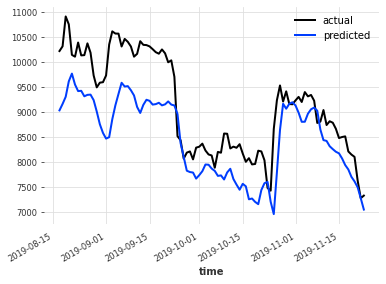

In [261]:
val[41:].plot(label="actual")
preds.plot(label="predicted")

In [262]:
print(mape(val,preds))

7.112675223543658


In [253]:
model_TCN = TCNModel(
    input_chunk_length=30,
    output_chunk_length=1,
    n_epochs=500,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,
)

model_TCN.fit(train_scaled)

[2022-04-23 13:45:21,550] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 522 samples.
[2022-04-23 13:45:21,550] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 522 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 522 samples.
[2022-04-23 13:45:21,550] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 3
[2022-04-23 13:45:21,550] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 3
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 3
[2022-04-23 13:45:21,550] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-23 13:45:21,550] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
INFO:pytorch_

Training: 0it [00:00, ?it/s]

In [254]:
val_scaled = scaler.transform(val)

In [255]:
%%capture
preds = model_TCN.historical_forecasts(
    val_scaled, start=0.3, forecast_horizon=1, retrain=False
)

# scale back:
preds = scaler.inverse_transform(preds)

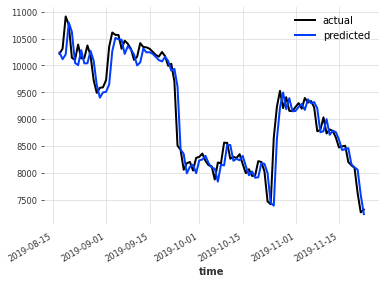

In [256]:
val[41:].plot(label="actual")
preds.plot(label="predicted")

In [257]:
print(mape(val[13:],preds))

2.0602069619900143


In [264]:
vader = pd.read_csv("C:\\Users\\bduser\\Desktop\\Harsh_Thesis_work\\vader_sentiment_scores.csv")

C:\Users\bduser\.conda\envs\Darts\lib\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [267]:
vader[vader['Sentiment_scores']<-0.05]

,Unnamed: 0,id,user,fullname,url,timestamp,replies,likes,retweets,text\r,Datetime,Date,Year,Sentiment_scores
10,10,1.076899e+18,StandUpAndRIOT,CryptoFelix 🌙,NaN,2018-12-23 16:56:17+00,18,146,29,The bear market came and it broke us. Not in t...,2018-12-23 16:56:17+00:00,2018-12-23,2018,-0.8074
25,25,1.013657e+18,Canonbodrangzen,Dhargey,NaN,2018-07-02 03:34:22+00,0,3,5,Soliciting cyber #hacking is a #crime. #BobThu...,2018-07-02 03:34:22+00:00,2018-07-02,2018,-0.5423
42,42,9.659739e+17,DCDOWORK,Dennis,NaN,2018-02-20 15:38:17+00,1,3,1,if you think $BTC is over bought your a damn m...,2018-02-20 15:38:17+00:00,2018-02-20,2018,-0.8402
70,70,9.517881e+17,crypto_skillz,cryptoskillz,/crypto_skillz/status/951788138170601473,2018-01-12 11:09:10+00,0,0,0,For the people out there who would rather have...,2018-01-12 11:09:10+00:00,2018-01-12,2018,-0.4939
98,98,9.631906e+17,CryptoCred,Cred,/CryptoCred/status/963190632725516290,2018-02-12 22:18:36+00,29,186,12,Firing up a $BTC technical analysis livestream...,2018-02-12 22:18:36+00:00,2018-02-12,2018,-0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317071,15317071,1.198266e+18,BlockchainBeth,BlockchainBeth,NaN,2019-11-23 15:44:33+00,0,0,0,@codeyisfun Went on a date with a wall st guy....,2019-11-23 15:44:33+00:00,2019-11-23,2019,-0.5267
15317086,15317086,1.197320e+18,HlGHKEYMOOD,omar,NaN,2019-11-21 01:05:22+00,23,87776,21015,the type of accidents I’m tryna make https://t...,2019-11-21 01:05:22+00:00,2019-11-21,2019,-0.4767
15317090,15317090,1.198266e+18,PokeTrainGuy96,Bryan L.,NaN,2019-11-23 15:44:57+00,0,0,0,"@TMZ Ooooh, I wonder how this effects #bitcoin...",2019-11-23 15:44:57+00:00,2019-11-23,2019,-0.7269
15317119,15317119,1.198266e+18,xStarDragonsx,🦊🐉MK's Art🐉🦊,NaN,2019-11-23 15:45:26+00,0,0,0,@StormYorha @BlazinHopeZ Lmao he probably thin...,2019-11-23 15:45:26+00:00,2019-11-23,2019,-0.6031


In [271]:
x = vader[vader['Sentiment_scores'] > -0.05]

In [272]:
x[x['Sentiment_scores'] < 0.05]

,Unnamed: 0,id,user,fullname,url,timestamp,replies,likes,retweets,text\r,Datetime,Date,Year,Sentiment_scores
0,0,1.039390e+18,coinimonster,CoiniMonster (Not giving away Coins),NaN,2018-09-11 05:46:06+00,0,3,2,I didnt tether at $7300 #iamspartacus\n$btc $e...,2018-09-11 05:46:06+00:00,2018-09-11,2018,0.0
6,6,1.079078e+18,TheCryptoCandy,The Crypto Candy 🍭,NaN,2018-12-29 18:11:46+00,180,2059,648,Is #History repeating? 🤔 \n\n#Bitcoin / #Gold ...,2018-12-29 18:11:46+00:00,2018-12-29,2018,0.0
9,9,1.078984e+18,Plasma_Pay,PlasmaPay,NaN,2018-12-29 11:58:20+00,2,100,132,"Remiit, a blockchain-powered remittance platfo...",2018-12-29 11:58:20+00:00,2018-12-29,2018,0.0
11,11,9.503921e+17,FSeksy,Fındıkzade seksy selin,NaN,2018-01-08 15:41:58+00,2,42,7,#bitcoin #aksaraytravesti #bakırköytravesti #ç...,2018-01-08 15:41:58+00:00,2018-01-08,2018,0.0
17,17,1.031689e+18,SE7ENCE,Bizul,NaN,2018-08-20 21:45:44+00,5,63,49,#Blockchain File Certification.\n\nlink: https...,2018-08-20 21:45:44+00:00,2018-08-20,2018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317133,15317133,1.198266e+18,Time2Crypto,Time2Crypto,NaN,2019-11-23 15:45:44+00,0,0,0,La tecnología #Blockchain puede ser aplicada e...,2019-11-23 15:45:44+00:00,2019-11-23,2019,0.0
15317136,15317136,1.198266e+18,Rafa40932345,Rafał,NaN,2019-11-23 15:45:49+00,0,0,0,"[Bitcoin Price May Hit $5.5K In 2020 To ""Wear ...",2019-11-23 15:45:49+00:00,2019-11-23,2019,0.0
15317139,15317139,1.198266e+18,theautomatski,Automatski,NaN,2019-11-23 15:45:53+00,0,0,0,The Worlds First Millennium Firm https://t.co/...,2019-11-23 15:45:53+00:00,2019-11-23,2019,0.0
15317143,15317143,1.198266e+18,Vizique,Vizique,NaN,2019-11-23 15:45:55+00,0,0,0,Bitcoin Suisse Certificates :) https://t.co/nd...,2019-11-23 15:45:55+00:00,2019-11-23,2019,0.0


In [273]:
vader[vader['Sentiment_scores'] > 0.05]

,Unnamed: 0,id,user,fullname,url,timestamp,replies,likes,retweets,text\r,Datetime,Date,Year,Sentiment_scores
1,1,1.078873e+18,TheBitfi,Bitfi - open source: bitfi.dev,NaN,2018-12-29 04:39:39+00,9,61,16,The first lab made diamond happened in 1955 &a...,2018-12-29 04:39:39+00:00,2018-12-29,2018,0.7964
2,2,9.862542e+17,keno_sanders,Keno Sanders,NaN,2018-04-17 14:44:58+00,1,7,1,Great talk and discussions about Bitcoin vs. E...,2018-04-17 14:44:58+00:00,2018-04-17,2018,0.7650
3,3,9.616666e+17,CryptoGamer_,CryptoGamer,NaN,2018-02-08 18:22:44+00,23,135,51,"When things are down, remember it's never as b...",2018-02-08 18:22:44+00:00,2018-02-08,2018,0.6259
4,4,1.005368e+18,Ok_coinexchange,OK.NET,NaN,2018-06-09 06:37:17+00,39,324,160,Wow! We reached 25K followers just within 4 we...,2018-06-09 06:37:17+00:00,2018-06-09,2018,0.9217
5,5,9.929014e+17,ThatCryptoKid,CryptoInvestor,NaN,2018-05-05 20:58:45+00,32,197,183,I’m back!!! Today's #giveaway is 0.35 #BTC (va...,2018-05-05 20:58:45+00:00,2018-05-05,2018,0.5994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317140,15317140,1.198261e+18,iceXzi,iceXzi,NaN,2019-11-23 15:24:08+00,17,20,24,$200 #PayPal or #Bitcoin #giveaway \n1) RT thi...,2019-11-23 15:24:08+00:00,2019-11-23,2019,0.6705
15317141,15317141,1.198266e+18,digital_mine_,digital mine ⚡🤖👨‍💻🇭🇰🇭🇰🇭🇰,NaN,2019-11-23 15:45:55+00,0,0,0,Daily profit for HODLING BTC since 2013 Data t...,2019-11-23 15:45:55+00:00,2019-11-23,2019,0.7003
15317142,15317142,1.198262e+18,JacobCanfield,Jacob Canfield,NaN,2019-11-23 15:28:50+00,2,16,3,Happy #FibonacciDay \n\nA while back I created...,2019-11-23 15:28:50+00:00,2019-11-23,2019,0.9073
15317145,15317145,1.198266e+18,Adekunl95628158,Adekunle Daniel,NaN,2019-11-23 15:45:57+00,0,0,0,@btc \n@btc \nDo you know that BTC Baskets isn...,2019-11-23 15:45:57+00:00,2019-11-23,2019,0.5267


In [276]:
df[df['sentiment_scores']<0.05]

,Date,Price,Open,High,Low,Vol.,Change %,sentiment_scores,total_tweets,bitcoin: (Worldwide)
time,,,,,,,,,,
2,2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,2.73,0.043841,79086.0,55
4,2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,11.69,0.048044,76404.0,50
5,2018-01-06,17172.3,16954.8,17252.8,16286.6,83930.0,1.28,0.044365,62977.0,46
6,2018-01-07,16228.2,17174.5,17184.8,15791.1,79010.0,-5.50,0.049224,67259.0,44
8,2018-01-09,14778.5,14976.2,15324.6,14613.4,71400.0,-1.32,0.049155,80932.0,49
...,...,...,...,...,...,...,...,...,...,...
400,2019-02-05,3468.4,3463.0,3485.9,3450.3,460950.0,0.16,0.045607,19792.0,37
402,2019-02-07,3397.7,3404.9,3421.8,3390.3,471360.0,-0.20,0.043921,18834.0,34
403,2019-02-08,3661.7,3397.3,3721.1,3382.5,699230.0,7.77,0.043441,20304.0,35
